In [45]:
#Importing all the pacakges and libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential #for sequential model
from keras.layers import Dense, LSTM #for dense and LSTM layers
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import pylab

In [46]:
data = pd.read_csv("airline-passengers.csv", usecols=[1], engine='python')

In [47]:
data.head(5)

,Passengers
0,112
1,118
2,132
3,129
4,121


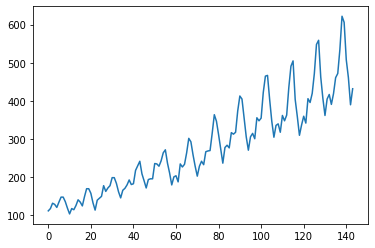

In [48]:
plt.plot(data)
plt.show()

Upward trend in Dataset

The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB


In [50]:
data = data.astype('float32')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  144 non-null    float32
dtypes: float32(1)
memory usage: 704.0 bytes


LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [52]:
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(data)

The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem.

As such, it can be used to create large recurrent networks that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results.

Instead of neurons, LSTM networks have memory blocks that are connected through layers.

A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence and each gate within a block uses the sigmoid activation units to control whether they are triggered or not, making the change of state and addition of information flowing through the block conditional.

There are three types of gates within a unit:

1. Forget Gate: conditionally decides what information to throw away from the block.
2. Input Gate: conditionally decides which values from the input to update the memory state.
3. Output Gate: conditionally decides what to output based on input and the memory of the block.

Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

### Task: given the number of passengers (in units of thousands) this month, what is the number of passengers next month?



We can write a simple function to convert our single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.

In [53]:
#fix random seed for reproducibility
np.random.seed(7)

In [54]:
# split into train and test sets
train_size = int(len(data) * 0.70)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

100 44


Now we can define a function to create a new dataset, as described above.

The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

It can be configured, and we will by constructing a differently shaped dataset in the next section.

In [55]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back=1):
	dataX, dataY = [], []
	for i in range(len(data)-look_back-1):
		a = data[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(data[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [56]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [57]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

The network has a visible layer with 1 input, a hidden layer with 10 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.

In [58]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
98/98 - 1s - loss: 0.0389
Epoch 2/100
98/98 - 0s - loss: 0.0172
Epoch 3/100
98/98 - 0s - loss: 0.0135
Epoch 4/100
98/98 - 0s - loss: 0.0123
Epoch 5/100
98/98 - 0s - loss: 0.0113
Epoch 6/100
98/98 - 0s - loss: 0.0103
Epoch 7/100
98/98 - 0s - loss: 0.0092
Epoch 8/100
98/98 - 0s - loss: 0.0083
Epoch 9/100
98/98 - 0s - loss: 0.0074
Epoch 10/100
98/98 - 0s - loss: 0.0065
Epoch 11/100
98/98 - 0s - loss: 0.0057
Epoch 12/100
98/98 - 0s - loss: 0.0050
Epoch 13/100
98/98 - 0s - loss: 0.0044
Epoch 14/100
98/98 - 0s - loss: 0.0039
Epoch 15/100
98/98 - 0s - loss: 0.0034
Epoch 16/100
98/98 - 0s - loss: 0.0031
Epoch 17/100
98/98 - 0s - loss: 0.0028
Epoch 18/100
98/98 - 0s - loss: 0.0026
Epoch 19/100
98/98 - 0s - loss: 0.0025
Epoch 20/100
98/98 - 0s - loss: 0.0023
Epoch 21/100
98/98 - 0s - loss: 0.0022
Epoch 22/100
98/98 - 0s - loss: 0.0022
Epoch 23/100
98/98 - 0s - loss: 0.0022
Epoch 24/100
98/98 - 0s - loss: 0.0022
Epoch 25/100
98/98 - 0s - loss: 0.0022
Epoch 26/100
98/98 - 0s - loss: 0.

In [59]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.03 RMSE
Test Score: 48.02 RMSE


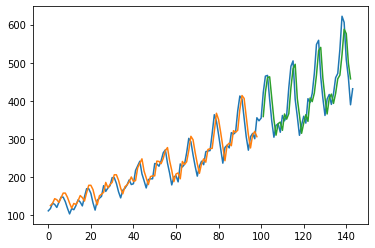

In [60]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()